# 1.4.12 Template Matching

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [13]:
img = cv2.imread('xr1.png',0)
img2 = img.copy()
template = cv2.imread('son2.png',0)

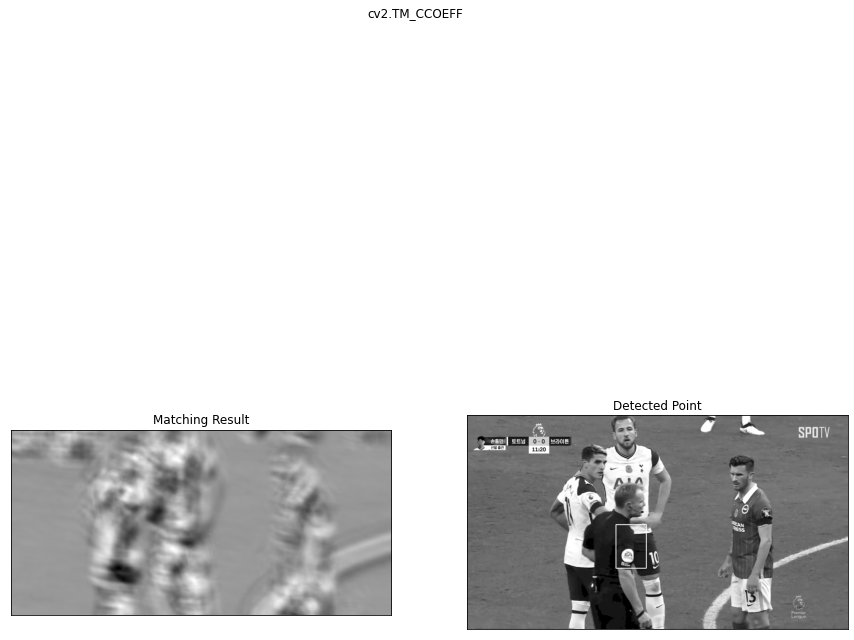

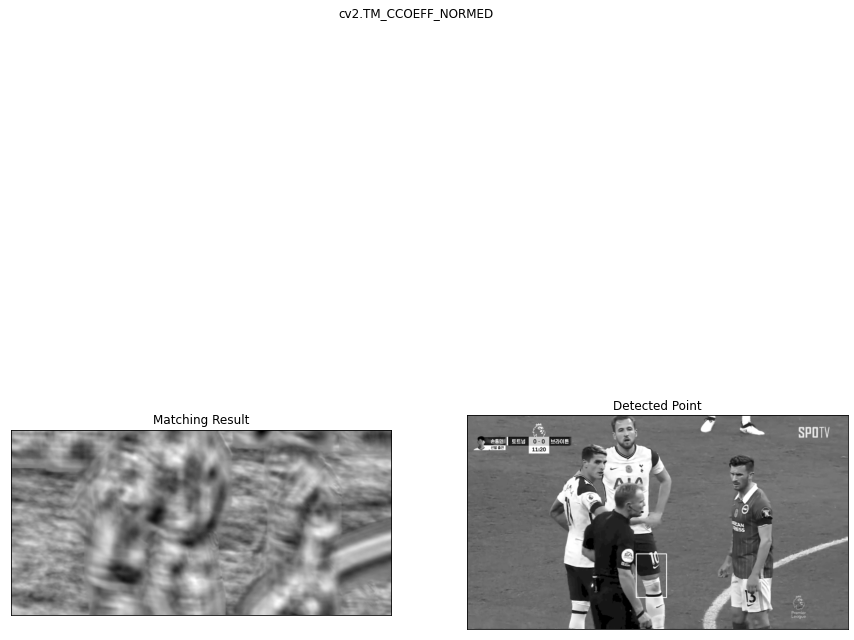

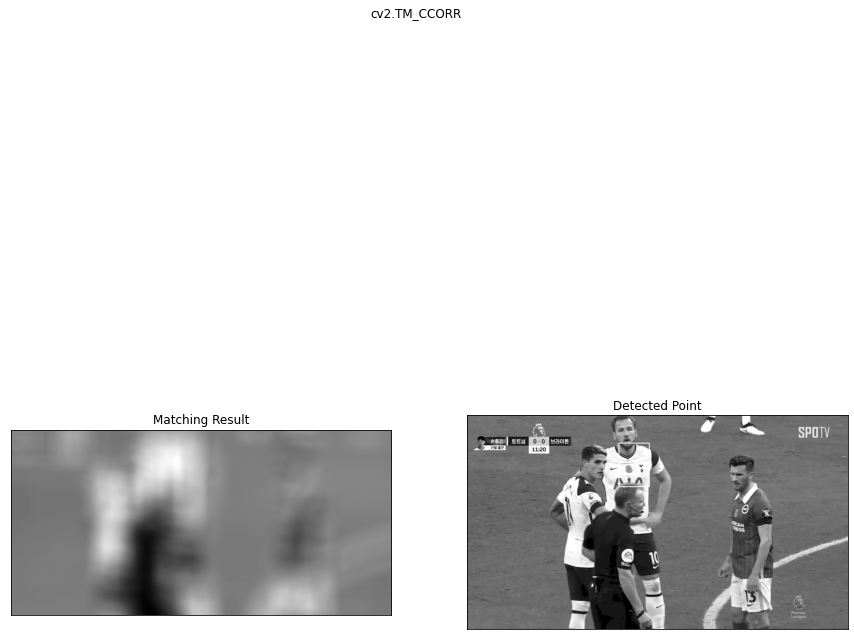

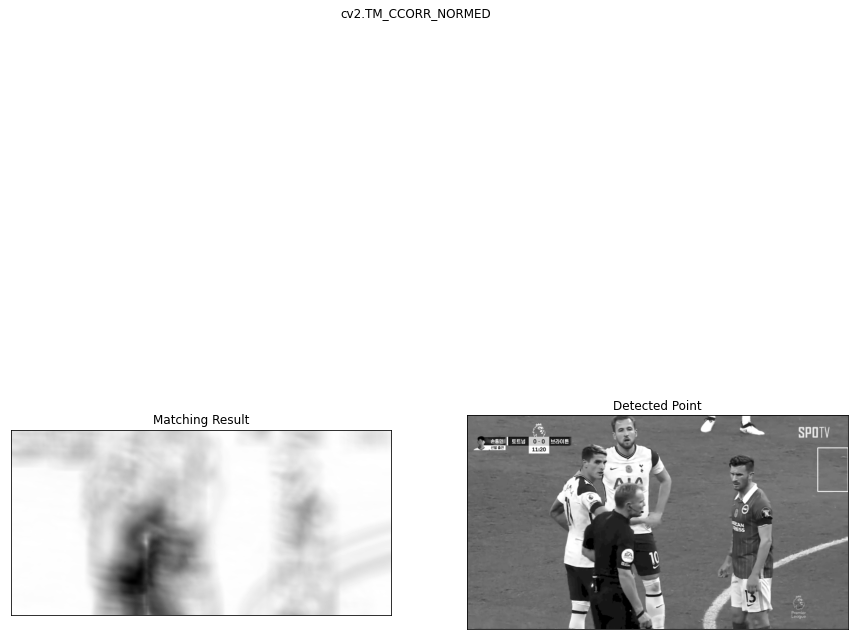

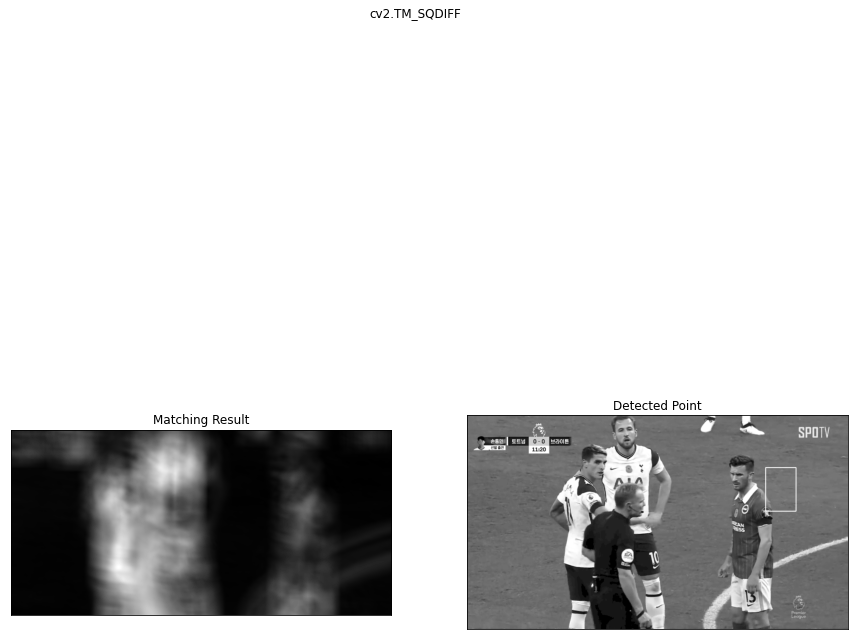

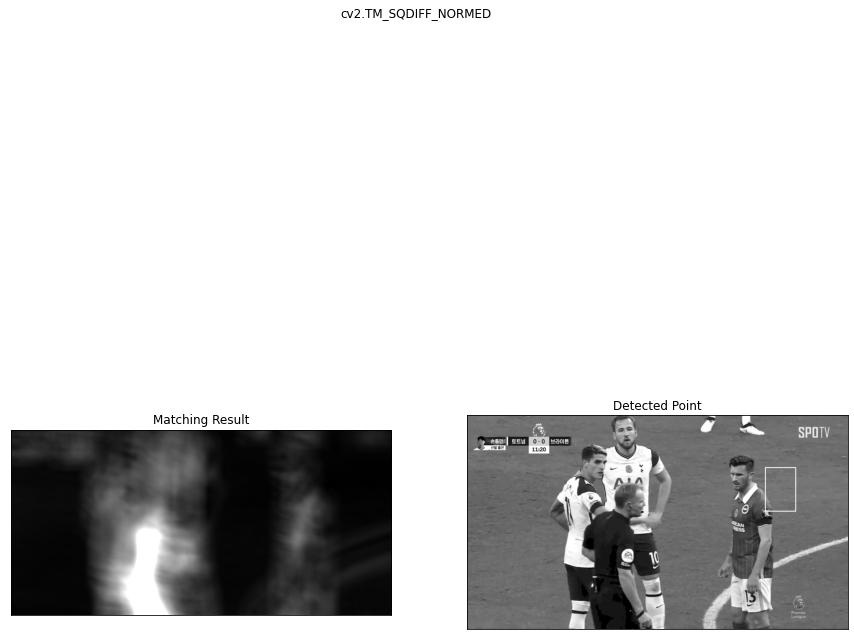

In [14]:
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)  
    ## 최대값 최소값 찾아서
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
        ## 최소값   두가지 방법
    else:
        top_left = max_loc
        ## 나머지 최대값
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.figure(figsize=(15,15))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [57]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [58]:
img_rgb = cv2.imread('mario.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('coin.png',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.5

In [59]:
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
##cv2.imwrite('res.png',img_rgb)
##cv2.imwrite('res.png',res)
cv2.imshow('res image',img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Template Matching with Multiple Objects   트랙바 사용


In [60]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [61]:
img_rgb = cv2.imread('mario.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('coin.png',0)
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)


In [62]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print(min_val, max_val, min_loc, max_loc)

-0.5677180290222168 0.5561313033103943 (1381, 1015) (832, 721)


In [63]:
res=(res-min_val)/(max_val-min_val)
print(res)

[[0.5051549  0.5051549  0.5051549  ... 0.5051549  0.5051549  0.5051549 ]
 [0.5051549  0.5051549  0.5051549  ... 0.5051549  0.5051549  0.5051549 ]
 [0.5051549  0.5051549  0.5051549  ... 0.5051549  0.5051549  0.5051549 ]
 ...
 [0.5794298  0.5519478  0.5246585  ... 0.6052909  0.6049698  0.6030905 ]
 [0.5860727  0.5565087  0.5272753  ... 0.6439342  0.64286906 0.64026505]
 [0.5866174  0.5544672  0.5227752  ... 0.66896605 0.6675273  0.6645797 ]]


In [64]:
threshold = 0.8
loc = np.where(res >= threshold)

In [65]:
print(loc[::-1])

(array([1137, 1138, 1139, ..., 1533, 1534, 1535], dtype=int64), array([  37,   37,   37, ..., 1148, 1148, 1148], dtype=int64))


In [66]:
img_rgb = cv2.imread('mario.png') #mario hmson2
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,255), 1)

In [67]:
cv2.imshow('dst',img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [68]:
def nothing(x):
    pass

In [70]:
cv2.namedWindow('image')
cv2.createTrackbar('threshold', 'image', 200, 255,nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    threshold = cv2.getTrackbarPos('threshold', 'image')
    loc = np.where(res >= threshold/255.)
    img_rgb = cv2.imread('mario.png')
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,255), 1)
    cv2.imshow('image',img_rgb)
cv2.destroyAllWindows()